# Using cartopy and projections for plotting

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
dset = xr.open_dataset("ERA5_air_temperature_at_2_metres_2020-06-30T2100.nc")

CPU times: total: 188 ms
Wall time: 220 ms


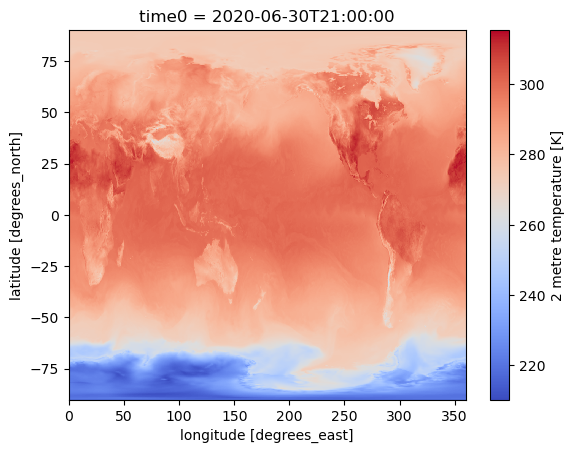

In [3]:
%%time 
dset['air_temperature_at_2_metres'].plot(cmap = 'coolwarm')
#same plot with local file


## Customize plot

Set the size of the figure and add coastlines

CPU times: total: 3.59 s
Wall time: 3.65 s


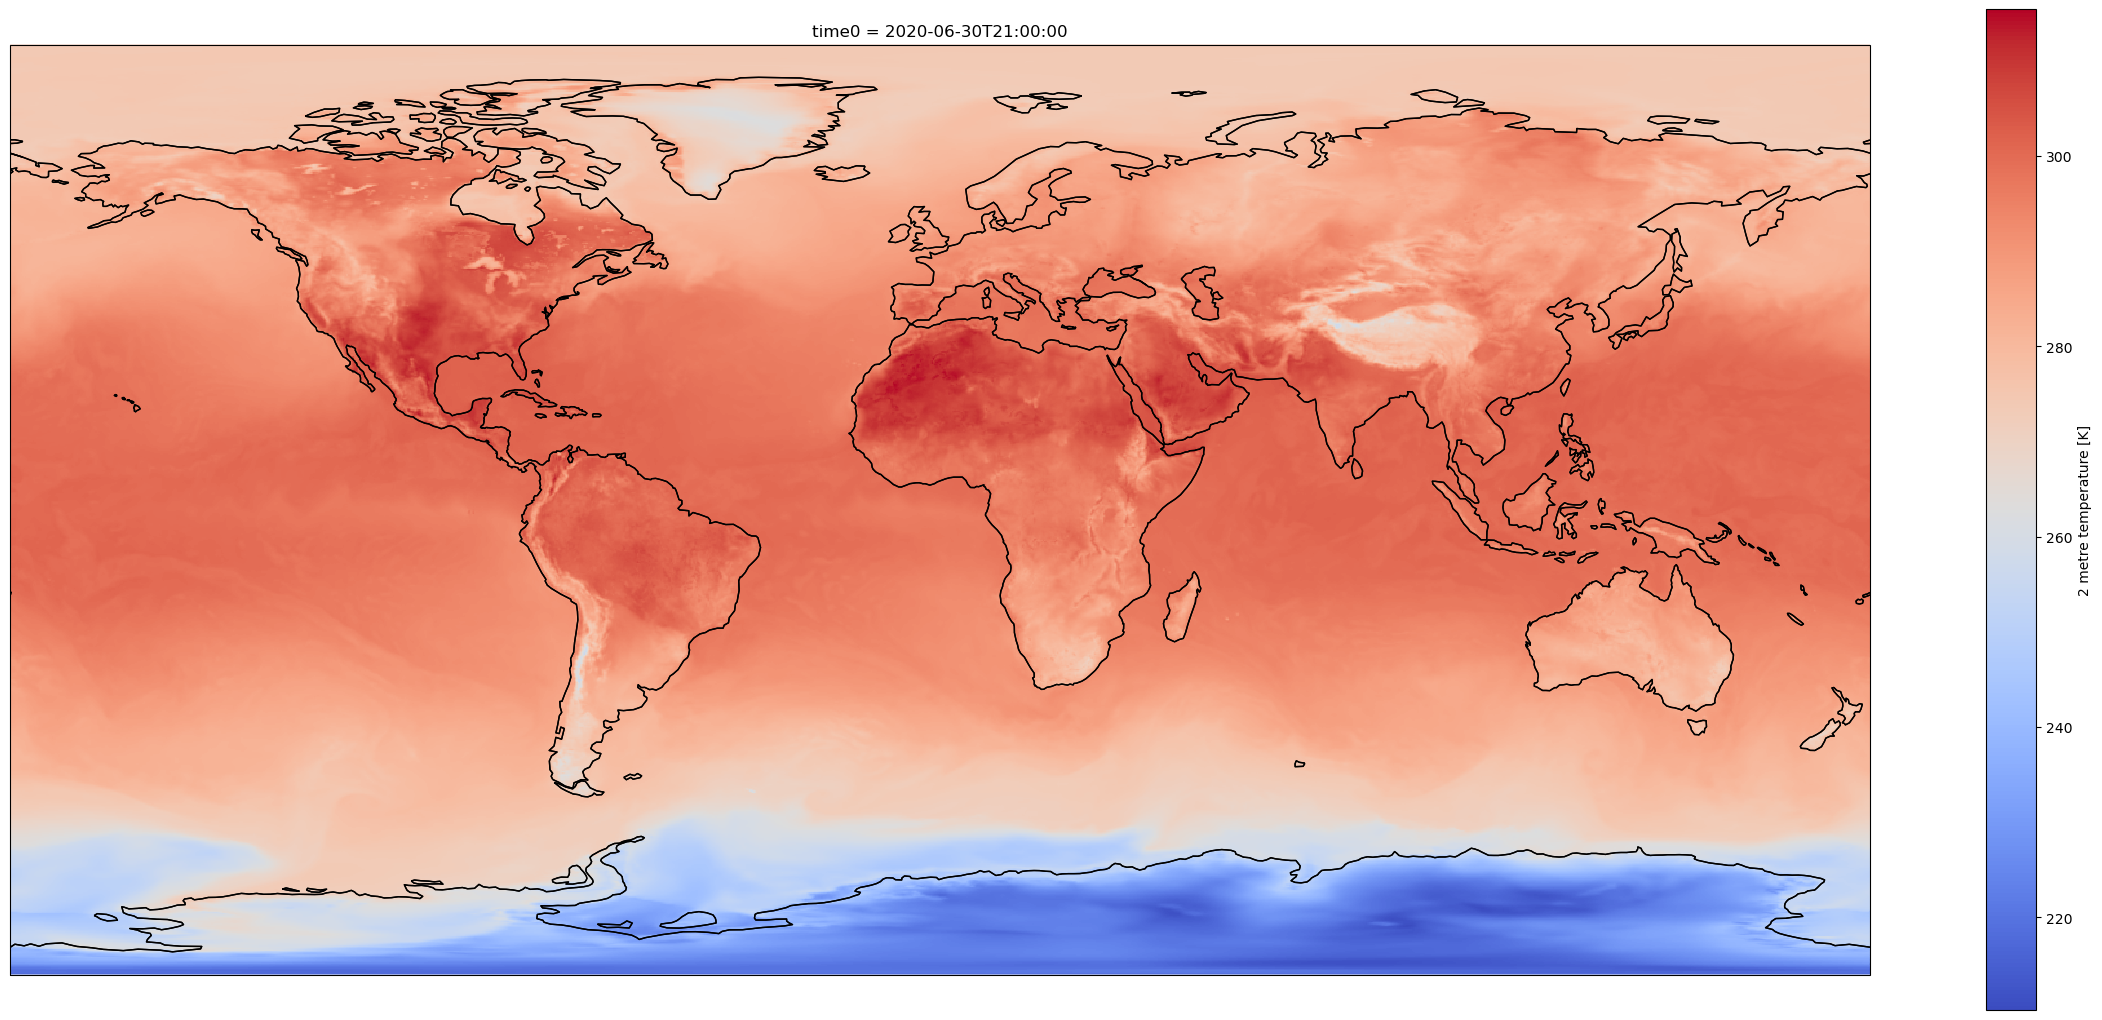

In [4]:
%%time
fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ay = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ay.coastlines()
# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
dset['air_temperature_at_2_metres'].plot.pcolormesh(ax=ax,cmap='coolwarm')

CPU times: total: 969 ms
Wall time: 955 ms


Text(0.5, 1.0, 'ERA5 air temperature at 2 metres\n 30th June 2020 at 21:00 UTC')

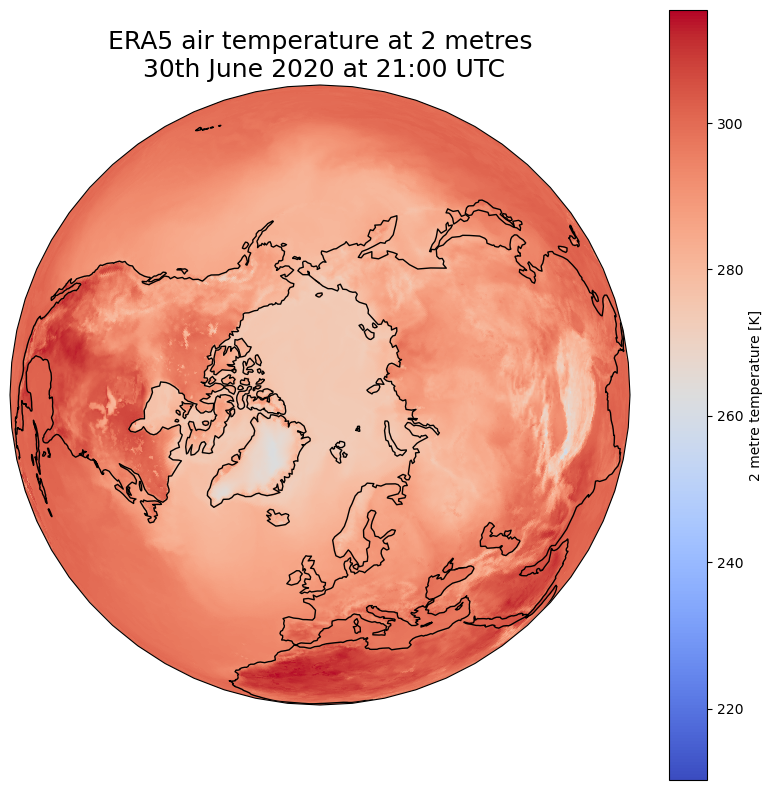

In [5]:
%%time

fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
dset['air_temperature_at_2_metres'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
plt.title("ERA5 air temperature at 2 metres\n 30th June 2020 at 21:00 UTC", fontsize=18)

CPU times: total: 969 ms
Wall time: 975 ms


Text(0.5, 1.0, 'ERA5 air temperature at 2 metres\n 30th June 2020 at 21:00 UTC')

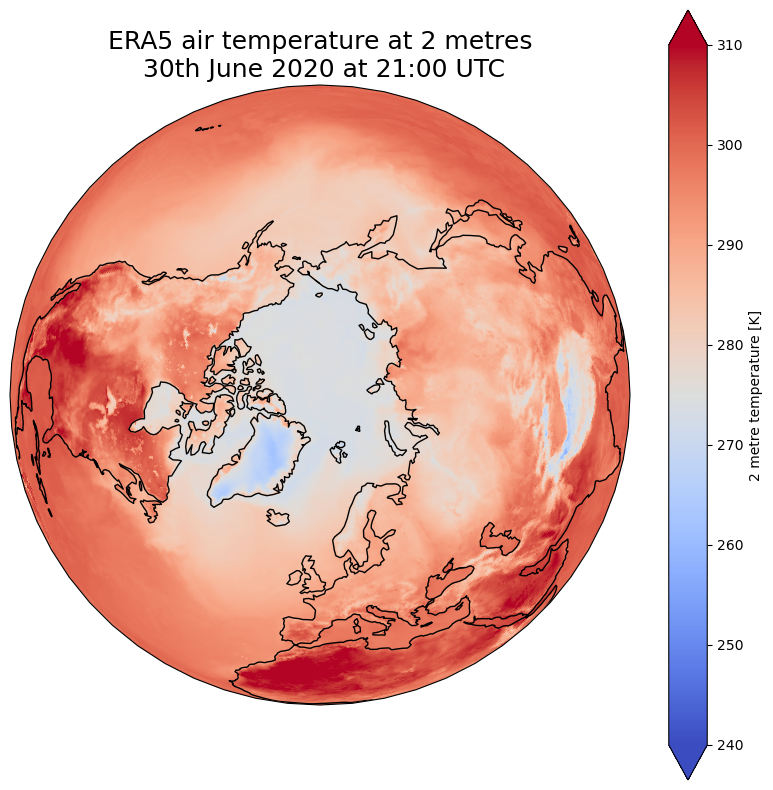

In [6]:
%%time
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# Fix extent
minval = 240
maxval = 310

# pass extent with vmin and vmax parameters
dset['air_temperature_at_2_metres'].plot(ax=ax, vmin=minval, vmax=maxval, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
plt.title("ERA5 air temperature at 2 metres\n 30th June 2020 at 21:00 UTC", fontsize=18)

## Combine plots with different projections

CPU times: total: 2.02 s
Wall time: 2.3 s


Text(0, 0.5, 'K')

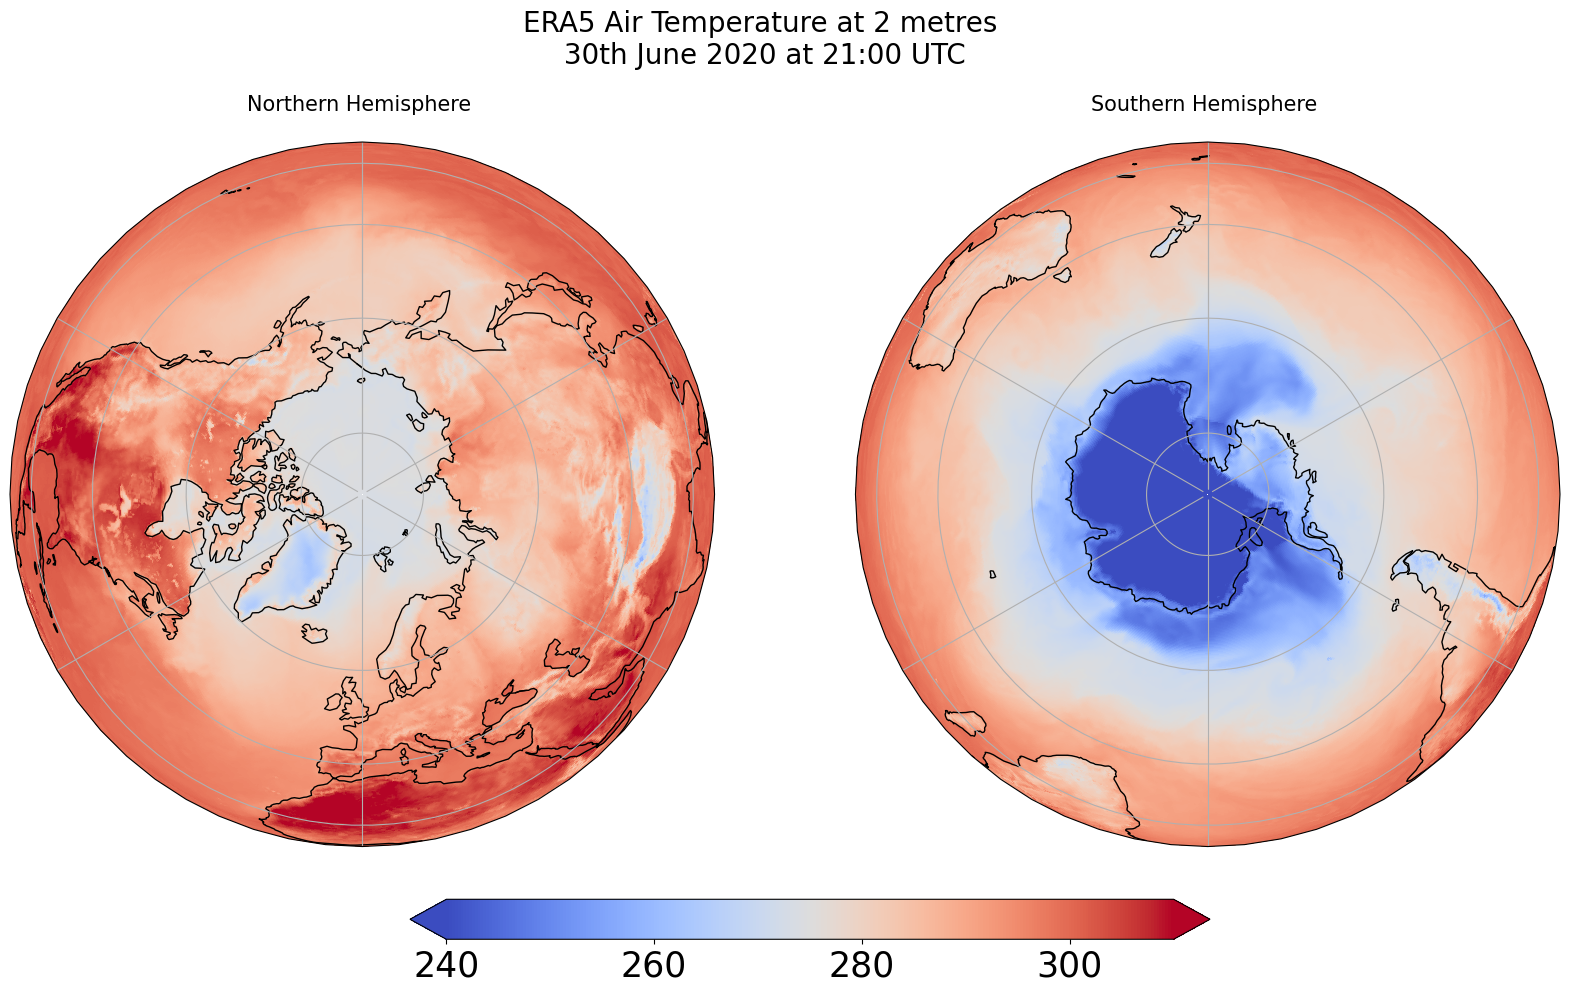

In [7]:
%%time
fig = plt.figure(1, figsize=[20,10])

# Fix extent
minval = 240
maxval = 310

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

tsel = 0
for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    map = dset['air_temperature_at_2_metres'].plot(ax=ax, vmin=minval, vmax=maxval, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='coolwarm', 
                                           add_colorbar=False)
    ax.set_title(t + " Hemisphere \n" , fontsize=15)
    ax.coastlines()
    ax.gridlines()

# Title for both plots
fig.suptitle('ERA5 Air Temperature at 2 metres\n 30th June 2020 at 21:00 UTC', fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('K', fontsize=25)

This is an example notebook to introduce you to the functions. 
Try to run the same with your project data.

1. Open your data file
2. Get metadata
3. Get your required variable
4. Create a simple visualization using xarray plotting method
5. Save your intermediate results to local disk
6. Plot with your local file
7. Customize your plots
    - Change plotting projection
    - Choose extent of values
    - Combine plots with different projections



